In [1]:
import pandas as pd
import numpy as np 
import datetime

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../credit_card/data/PS_20174392719_1491204439457_log.csv', index_col=0)

In [29]:
df = data.sample(500000).reset_index()
df = df.drop('step', axis=1)

In [80]:
df.sample(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
358889,CASH_IN,382146.55,C1831831964,282.0,382428.55,C1683242679,0.0,0.00,0,0
391385,CASH_OUT,51375.72,C1990900429,31671.0,0.00,C1352881462,0.0,51375.72,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            500000 non-null  object 
 1   amount          500000 non-null  float64
 2   nameOrig        500000 non-null  object 
 3   oldbalanceOrg   500000 non-null  float64
 4   newbalanceOrig  500000 non-null  float64
 5   nameDest        500000 non-null  object 
 6   oldbalanceDest  500000 non-null  float64
 7   newbalanceDest  500000 non-null  float64
 8   isFraud         500000 non-null  int64  
 9   isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 38.1+ MB


In [32]:
df.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
df['isFraud'].value_counts()

isFraud
0    499376
1       624
Name: count, dtype: int64

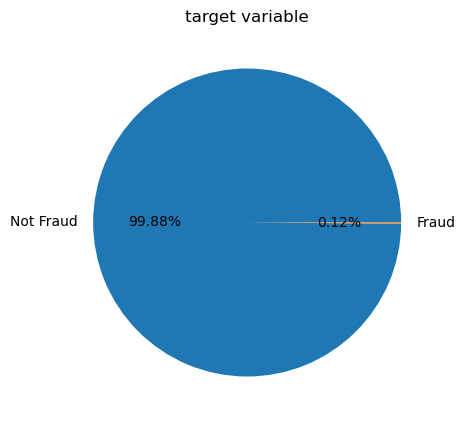

In [35]:
is_fraud = df['isFraud'].value_counts()
label = ['Not Fraud', 'Fraud']

plt.figure(figsize=(5,5))
plt.pie(is_fraud, labels=label, autopct='%.2f%%')
plt.title('target variable')
plt.show()

In [36]:
df[df.isFraud==1].head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
159,TRANSFER,362988.52,C1442171840,362988.52,0.0,C1053252672,0.00,0.00,1,0
377,CASH_OUT,776303.43,C264646287,776303.43,0.0,C1422542191,414402.89,1190706.32,1,0
1009,TRANSFER,4737833.35,C1353278775,4737833.35,0.0,C547279990,0.00,0.00,1,0
2002,CASH_OUT,1123639.01,C220508726,1123639.01,0.0,C1745434943,0.00,1123639.01,1,0
3038,TRANSFER,1150413.99,C412631050,1150413.99,0.0,C1746289877,0.00,0.00,1,0


In [37]:
df['type'].value_counts()

type
CASH_OUT    175967
PAYMENT     169340
CASH_IN     109676
TRANSFER     41808
DEBIT         3209
Name: count, dtype: int64

In [38]:
fraud_type = df.groupby(['type', 'isFraud']).size()
fraud_type

type      isFraud
CASH_IN   0          109676
CASH_OUT  0          175681
          1             286
DEBIT     0            3209
PAYMENT   0          169340
TRANSFER  0           41470
          1             338
dtype: int64

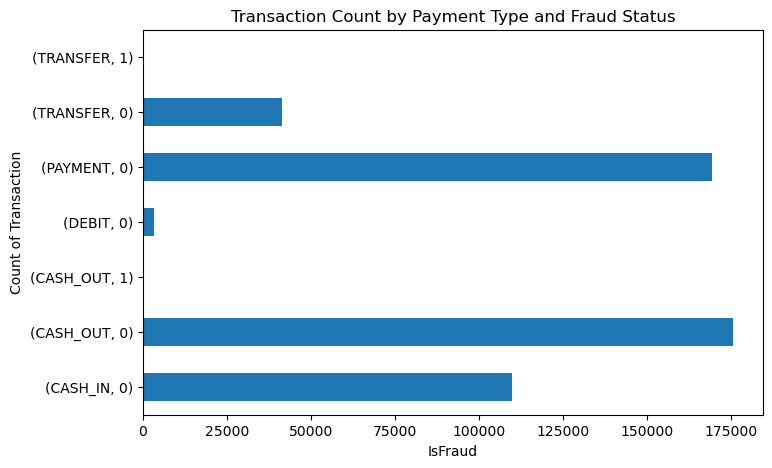

In [39]:
plt.figure(figsize=(8, 5))

fraud_type.plot(kind='barh')
plt.title("Transaction Count by Payment Type and Fraud Status")
plt.xlabel("IsFraud")
plt.ylabel("Count of Transaction")

plt.show()

In [40]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    499996
1         4
Name: count, dtype: int64

In [41]:
df[df.isFlaggedFraud==1].head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
58528,TRANSFER,399045.08,C724693370,10399045.08,10399045.08,C1909486199,0.0,0.0,1,1
121187,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.0,0.0,1,1
204271,TRANSFER,3441041.46,C917414431,3441041.46,3441041.46,C1082139865,0.0,0.0,1,1
370810,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1


In [42]:
# Melalukan subset pada data numeric dan kategorik
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

In [43]:
# Mengidentifikasi untuk kolom numerik
num_plots = len(num)
num_rows = (num_plots // 5) + 1 
num_cols = 5 

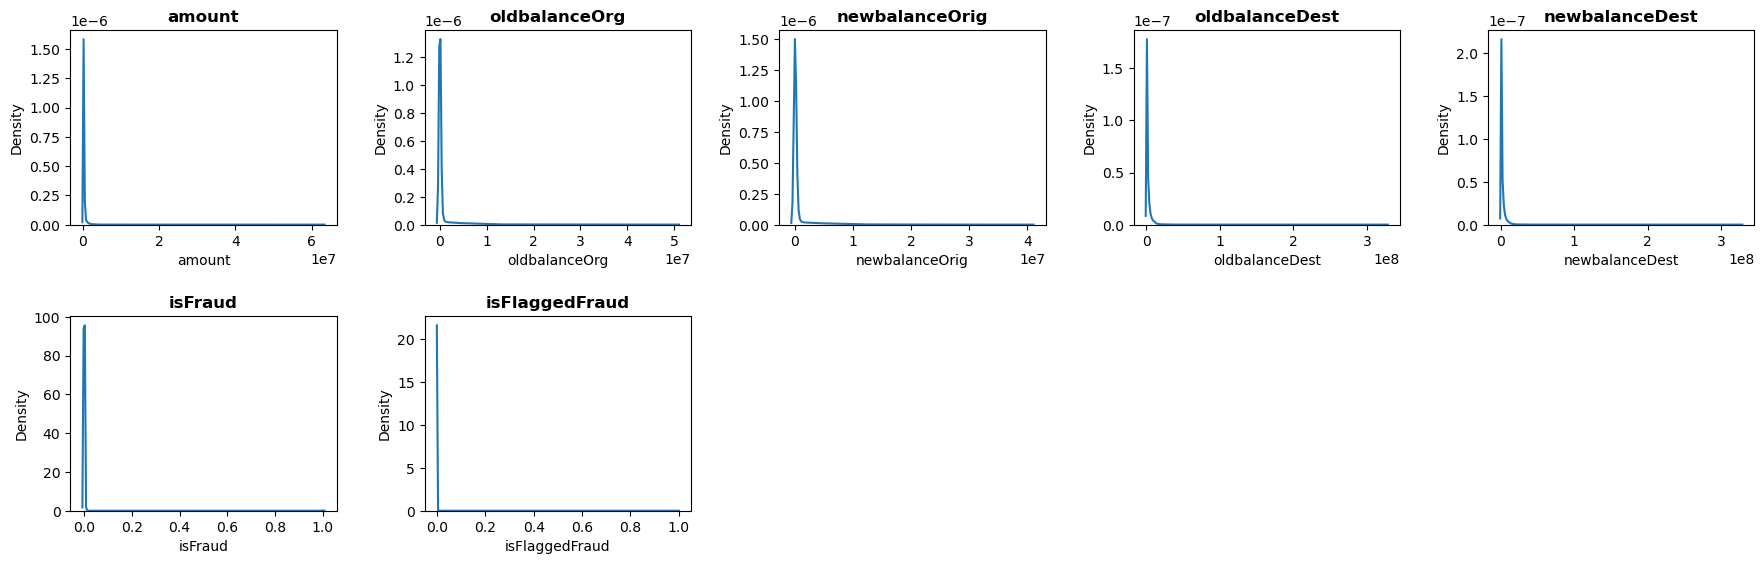

In [44]:
rcParams['figure.figsize'] = 18, 3 * num_rows  
for i in range(0, len(num)):
    plt.subplot(num_rows, num_cols, i+1) 
    sns.kdeplot(x=df[num[i]])
    plt.title(num[i], fontsize=12, fontweight='bold')
    plt.tight_layout(pad=2)
plt.show()

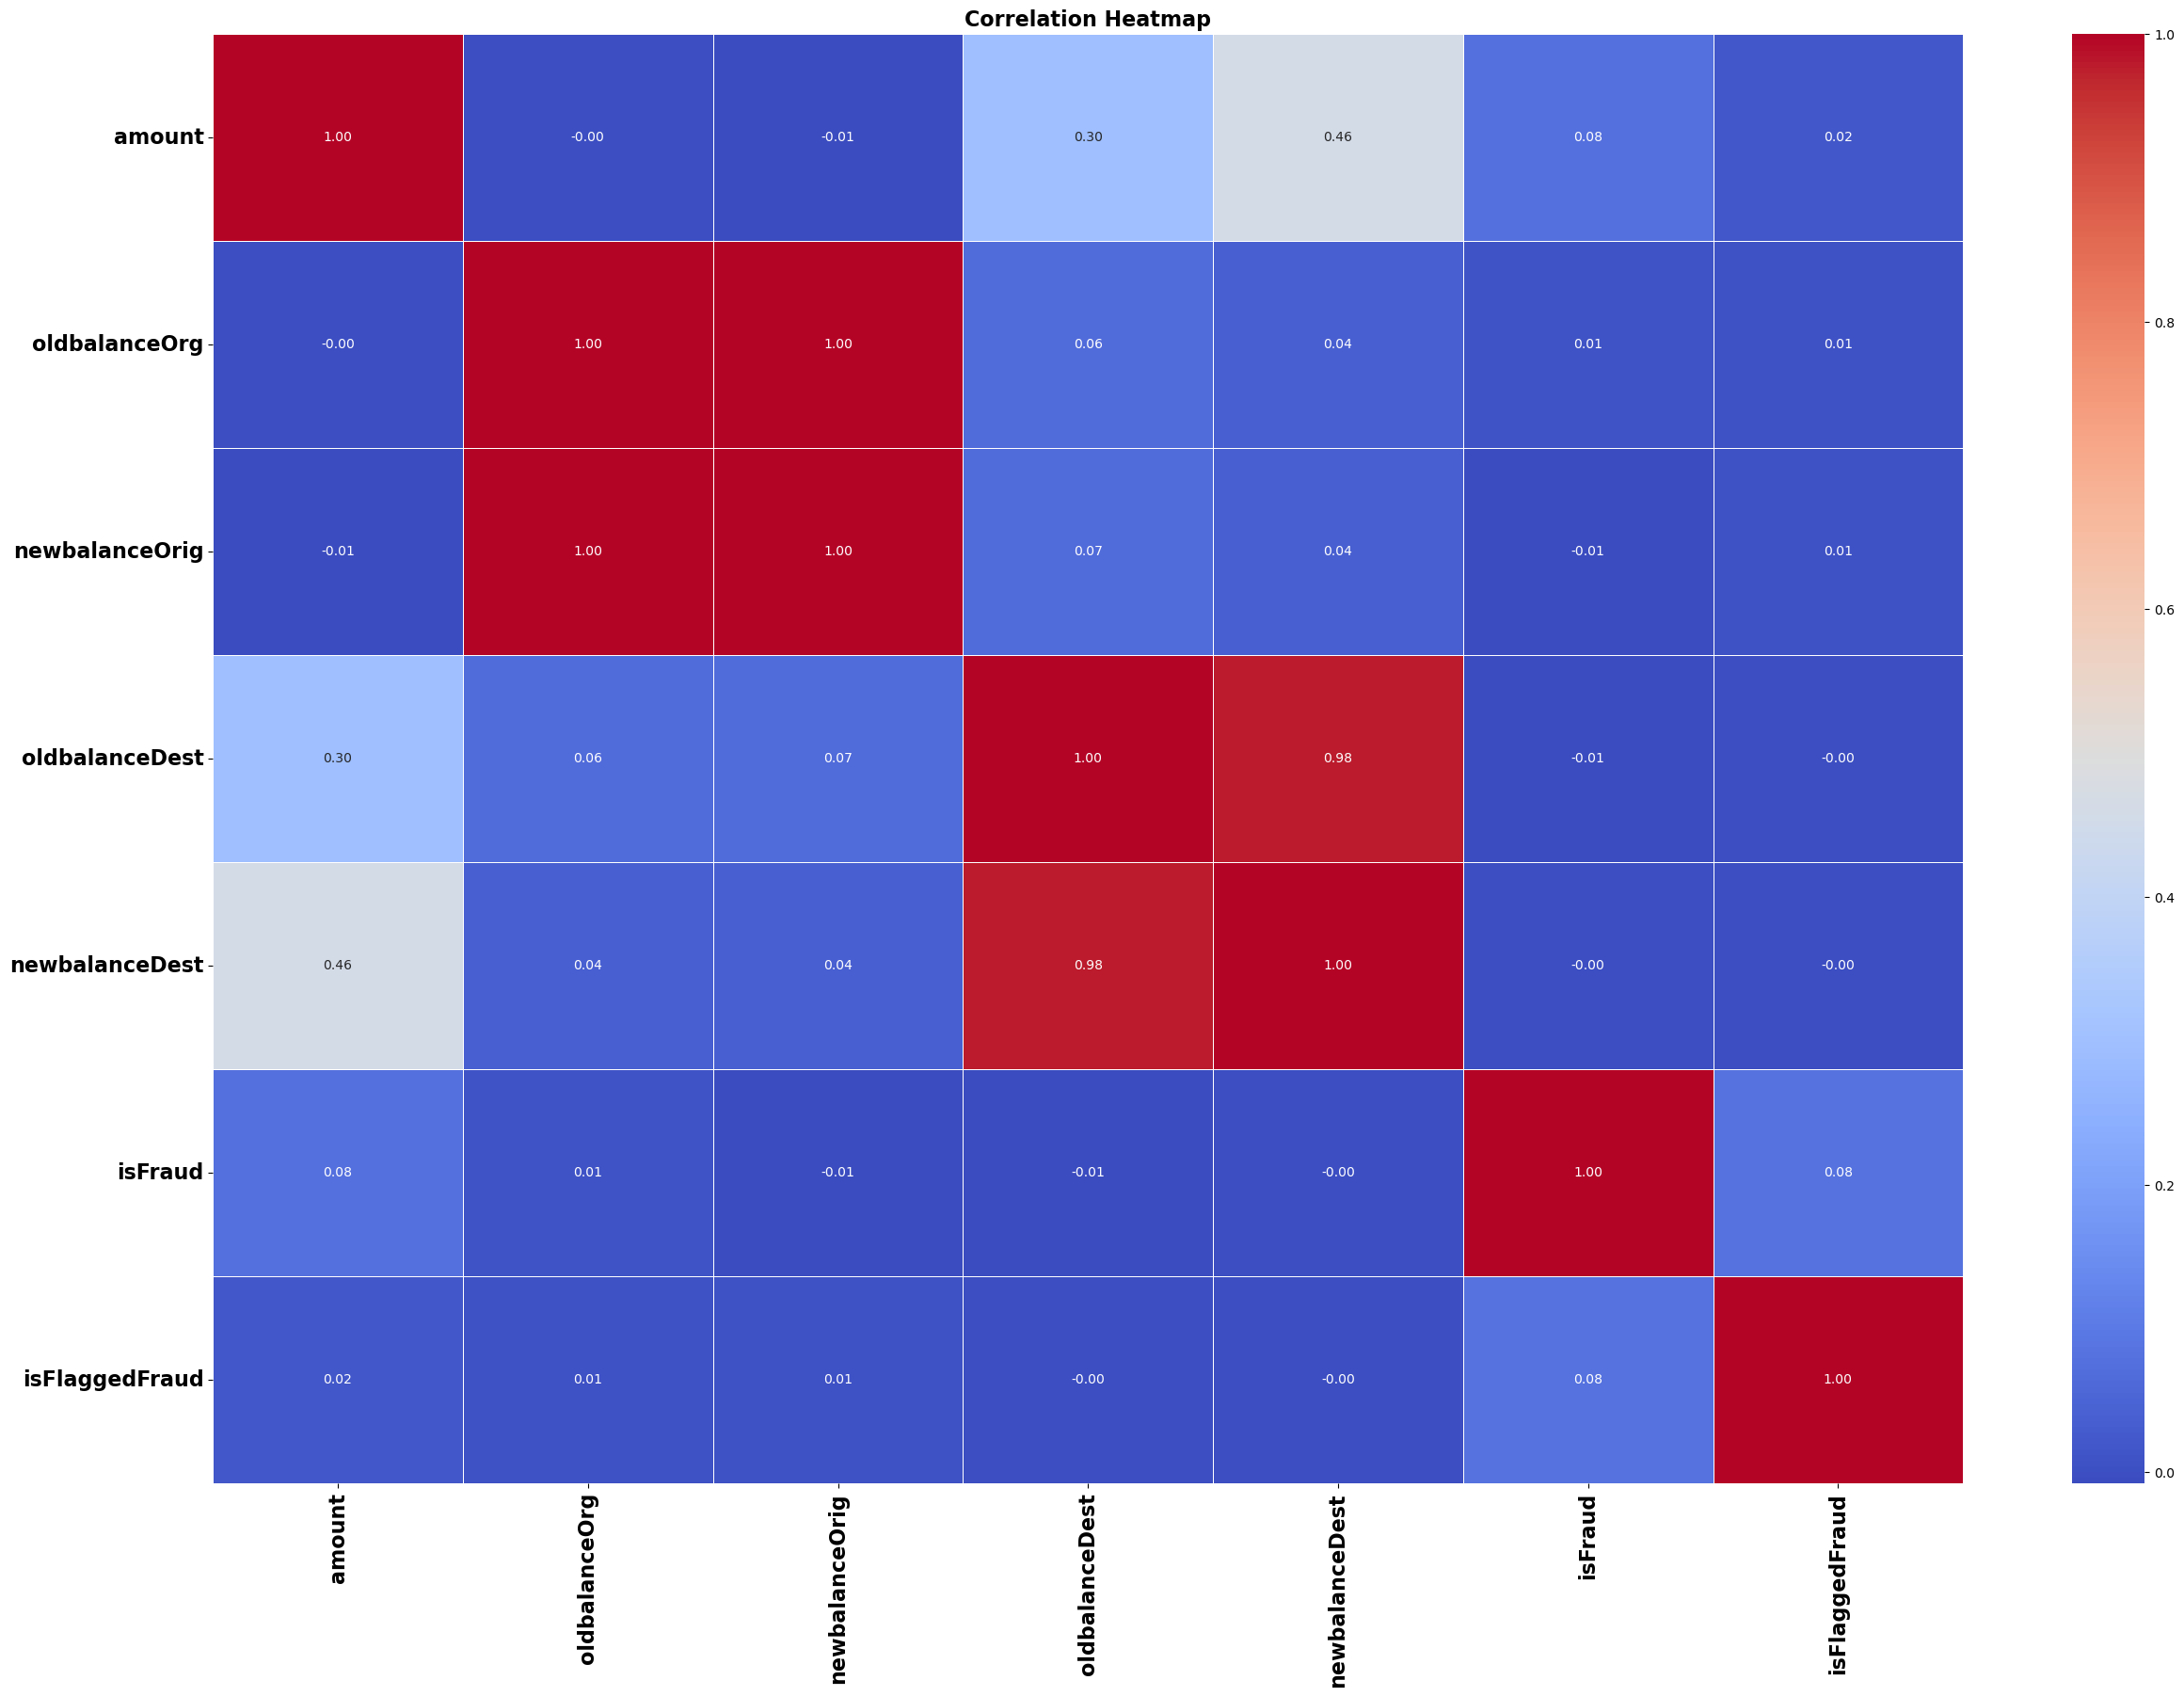

In [45]:
corr = df[num].corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16, fontweight='bold')
plt.yticks(rotation=0, fontsize=16, fontweight='bold')
plt.show()

### Data Clean

In [51]:
df_clean = df.copy()

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            500000 non-null  object 
 1   amount          500000 non-null  float64
 2   nameOrig        500000 non-null  object 
 3   oldbalanceOrg   500000 non-null  float64
 4   newbalanceOrig  500000 non-null  float64
 5   nameDest        500000 non-null  object 
 6   oldbalanceDest  500000 non-null  float64
 7   newbalanceDest  500000 non-null  float64
 8   isFraud         500000 non-null  int64  
 9   isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 38.1+ MB


In [53]:
df_clean['type'].unique()

array(['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [54]:
ohe = pd.get_dummies(df_clean['type'], drop_first=True)
df_clean = df_clean.join(ohe)

In [55]:
df_clean.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,PAYMENT,16140.39,C1664998452,0.0,0.0,M1941282989,0.0,0.0,0,0,False,False,True,False


In [76]:
df_scaler = df_clean.copy()
col_std = df_std[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].columns

In [77]:
scaler = MinMaxScaler()

scaler.fit(df_scaler[col_std])
df_scaler[col_std] = scaler.transform(df_scaler[col_std])

df_scaler.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,PAYMENT,0.000255,C1664998452,0.000000,0.0,M1941282989,0.000000,0.000000,0,0,False,False,True,False
1,CASH_OUT,0.002054,C32738829,0.000000,0.0,C1528316458,0.000999,0.001395,0,0,True,False,False,False
2,PAYMENT,0.000021,C1353616539,0.000000,0.0,M1463154889,0.000000,0.000000,0,0,False,False,True,False
3,PAYMENT,0.000097,C1921381750,0.000121,0.0,M2017369670,0.000000,0.000000,0,0,False,False,True,False
4,CASH_OUT,0.002583,C2140910629,0.000000,0.0,C621014131,0.008395,0.008893,0,0,True,False,False,False


### Eksport File

In [81]:
df_clean.to_csv('../credit_card/data/data_clean.csv')

In [82]:
df_scaler.to_csv('../credit_card/data/data_scaler.csv')